# Used Car Price Prediction Project 

In [67]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings

In [68]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [42]:
df=pd.read_csv('usedCars.csv')
df.head()

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,555675,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,NaN,2018-02-01,2018,NaN,5.75 Lakhs,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,556383,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,Manual,2021-03-01,2021,NaN,4.35 Lakhs,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,556422,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,Manual,2015-03-01,2015,NaN,4.7 Lakhs,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,556771,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,NaN,2020-08-01,2020,NaN,9.9 Lakhs,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,559619,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,Manual,2010-11-01,2010,NaN,2.7 Lakhs,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


## Data Cleaning

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1064 non-null   int64  
 1   Company           1064 non-null   object 
 2   Model             1064 non-null   object 
 3   Variant           1064 non-null   object 
 4   FuelType          1063 non-null   object 
 5   Colour            1064 non-null   object 
 6   Kilometer         1064 non-null   int64  
 7   BodyStyle         1064 non-null   object 
 8   TransmissionType  350 non-null    object 
 9   ManufactureDate   1064 non-null   object 
 10  ModelYear         1064 non-null   int64  
 11  CngKit            22 non-null     object 
 12  Price             1064 non-null   object 
 13  Owner             1064 non-null   object 
 14  DealerState       1064 non-null   object 
 15  DealerName        1064 non-null   object 
 16  City              1064 non-null   object 


In [44]:
df['Price'].sort_values()

992       1 Lakhs
953    1.19 Lakhs
976     1.2 Lakhs
917     1.4 Lakhs
508    1.45 Lakhs
          ...    
179    9.91 Lakhs
749    9.92 Lakhs
724    9.97 Lakhs
5      9.99 Lakhs
291        95,000
Name: Price, Length: 1064, dtype: object

**Type Casting Price column to Float**

In [45]:
def convert_amnt(amt):
    if 'Lakhs' in amt:
        # 1 Lakhs=100000 thats why conversion is done 
        return float(amt.replace(' Lakhs','').replace(',',''))*100000
    else:
        # there is some entries which contain comma( , )
        return float(amt.replace(',',''))
df['Price']=df['Price'].apply(convert_amnt)

In [46]:
df.describe(include='all')

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
count,1064.000000,1064,1064,1064,1063,1064,1064.000000,1064,350,1064,1064.000000,22,1.064000e+03,1064,1064,1064,1064,1064.000000,1064.000000
unique,NaN,23,218,575,5,76,NaN,10,9,162,NaN,2,NaN,4,10,57,11,NaN,NaN
top,NaN,MARUTI SUZUKI,SWIFT,VXI,PETROL,White,NaN,HATCHBACK,Manual,2018-01-01,NaN,Company Fitted,NaN,1st Owner,Delhi,Car Choice Exclusif,Delhi,NaN,NaN
freq,NaN,252,38,37,670,289,NaN,423,269,25,NaN,14,NaN,897,196,67,196,NaN,NaN
mean,568156.542293,NaN,NaN,NaN,NaN,NaN,52807.187970,NaN,NaN,NaN,2016.864662,NaN,8.350536e+05,NaN,NaN,NaN,NaN,0.738722,7.770207
std,16438.139974,NaN,NaN,NaN,NaN,NaN,33840.296979,NaN,NaN,NaN,2.996786,NaN,5.726538e+05,NaN,NaN,NaN,NaN,0.439538,0.719717
min,525978.000000,NaN,NaN,NaN,NaN,NaN,101.000000,NaN,NaN,NaN,2003.000000,NaN,9.500000e+04,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,555321.500000,NaN,NaN,NaN,NaN,NaN,32113.500000,NaN,NaN,NaN,2015.000000,NaN,4.850000e+05,NaN,NaN,NaN,NaN,0.000000,7.500000
50%,572753.000000,NaN,NaN,NaN,NaN,NaN,49432.000000,NaN,NaN,NaN,2017.000000,NaN,6.750000e+05,NaN,NaN,NaN,NaN,1.000000,7.800000
75%,583072.750000,NaN,NaN,NaN,NaN,NaN,68828.500000,NaN,NaN,NaN,2019.000000,NaN,9.850000e+05,NaN,NaN,NaN,NaN,1.000000,8.100000


In [47]:
#Null values percentage wise
df.isnull().sum()/len(df)*100

Id                   0.000000
Company              0.000000
Model                0.000000
Variant              0.000000
FuelType             0.093985
Colour               0.000000
Kilometer            0.000000
BodyStyle            0.000000
TransmissionType    67.105263
ManufactureDate      0.000000
ModelYear            0.000000
CngKit              97.932331
Price                0.000000
Owner                0.000000
DealerState          0.000000
DealerName           0.000000
City                 0.000000
Warranty             0.000000
QualityScore         0.000000
dtype: float64

**In this dataset - three columns have missing values -FuelType,TransmissionType and CngKit**
* Will remove the CngKit column because CNG cars can be identified from the FuelType column
* In TransmissionType, 67% data is missing lets drop this column
* And in FuelType will drop the rows with null values

In [48]:
df.drop('CngKit',axis=1,inplace=True)
df.drop('TransmissionType',axis=1,inplace=True)
#Removing null values from FuelType column
df['FuelType'].dropna(inplace=True)

In [49]:
df['Variant'].nunique()

575

**The number of unique variants is very high and would create too many categories (resulting in overfitting or sparsity), it might be better to drop it**

In [50]:
df.drop('Variant',axis=1,inplace=True)
#Variants can influence the price due to differences in features, trims, and specifications. 
#However, this information might already be captured in other features like FuelType, Warranty, or QualityScore

In [51]:
#dropping column ID, as it is a identifier and not required for analysis
df.drop('Id',axis=1,inplace=True)

In [52]:
df[['ManufactureDate','ModelYear']]

,ManufactureDate,ModelYear
0,2018-02-01,2018
1,2021-03-01,2021
2,2015-03-01,2015
3,2020-08-01,2020
4,2010-11-01,2010
...,...,...
1059,2020-09-01,2020
1060,2019-01-01,2019
1061,2013-05-01,2013
1062,2018-06-01,2018


**Dropping ManufactureDate column as it the age of the car and we already have the ModelYear column**

In [53]:
df.drop('ManufactureDate',axis=1,inplace=True)

**Changing the model year column to car age column**

In [54]:
df['ModelYear'] = 2023 - df['ModelYear']
df.rename(columns={'ModelYear':'Age'},inplace=True)

In [55]:
df['BodyStyle'].unique()

array(['HATCHBACK', 'SEDAN', 'MPV', 'SUV', 'HATCHBACK ', 'VAN', 'MUV',
       'COMPACTSUV', 'Sedan', 'SUV '], dtype=object)

In [56]:
df['BodyStyle']=df['BodyStyle'].str.strip().str.upper()
df['BodyStyle'].unique()

array(['HATCHBACK', 'SEDAN', 'MPV', 'SUV', 'VAN', 'MUV', 'COMPACTSUV'],
      dtype=object)

In [57]:
df.head()

,Company,Model,FuelType,Colour,Kilometer,BodyStyle,Age,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,MARUTI SUZUKI,CELERIO(2017-2019),PETROL,Silver,33197,HATCHBACK,5,575000.0,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,MARUTI SUZUKI,ALTO,PETROL,Red,10322,HATCHBACK,2,435000.0,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,HYUNDAI,GRAND I10,PETROL,Grey,37889,HATCHBACK,8,470000.0,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,TATA,NEXON,PETROL,A Blue,13106,HATCHBACK,3,990000.0,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,FORD,FIGO,DIESEL,Silver,104614,HATCHBACK,13,270000.0,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


## Visualisation(EDA)

### Car Company

Text(0.5, 1.0, 'Number of cars by company')

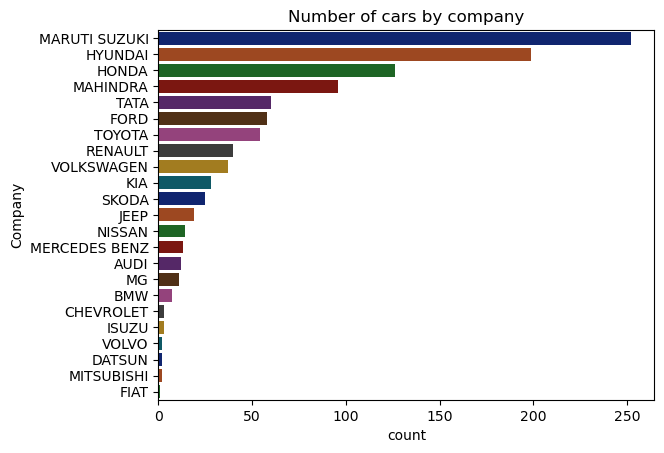

In [69]:
sns.countplot(data=df['Company'],order=df['Company'].value_counts().index,palette='dark').set_title('Number of cars by company')

There are total 23 companies in the dataset, out which Maruti Suzuki, Hyundai, Honda, Mahindra and Tata are the top five companies who used cars are for sale. Therefore, we can assume 
* That these company's car are more durable and have a good resale value.
* These brands likely offer cars at prices that appeal to more people, making them popular in the resale market.


### Top 10 Car Models

Text(0.5, 1.0, 'Top 10 Car Models')

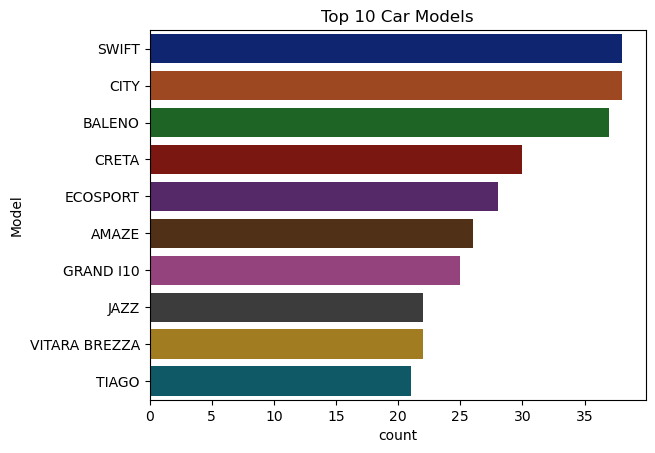

In [70]:
sns.countplot(data=df['Model'],order=df['Model'].value_counts().iloc[:10].index,palette='dark').set_title('Top 10 Car Models')

Honda City and Swift are the top two car models in the dataset, followed by Baleno, Creata and EcoSport. Therefore, we can assume 
* That these car models are more durable and have a good resale value.
* Graph also shows that Honda City and Swift are more in demand in the used car market.

### Car Fuel Type

Text(0.5, 1.0, 'Number of cars by Fuel Type')

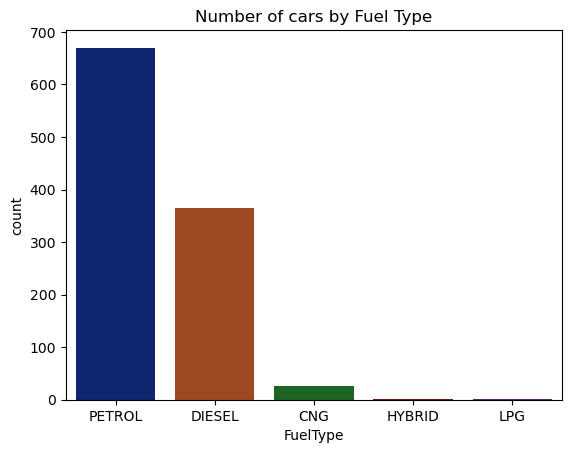

In [72]:
sns.countplot(x = 'FuelType', data = df, palette = 'dark').set_title('Number of cars by Fuel Type')

## Data Transformation

In [25]:
df['Model'].nunique()

218

In [149]:
# Columns for label encoding (excluding 'Model')
cols = df.select_dtypes(include=['object']).columns
cols = cols.drop('Model')  # Exclude 'Model' for target encoding

# Label Encoding object
le = LabelEncoder()

# Label encoding for object-type columns (excluding 'Model')
for col in cols:
    df[col] = le.fit_transform(df[col]) + 1  # Adding 1 to start encoding from 1

# Target Encoding for 'Model'
model_target_mean = df.groupby('Model')['Price'].mean()  # Calculate mean price for each model
df['Model_Encoded'] = df['Model'].map(model_target_mean)  # Map mean price to 'Model'

# Dropping original 'Model' column if no longer needed
df.drop('Model', axis=1, inplace=True)


In [150]:
#Using IQRS to remove outliers

#columns for outlier removal
cols = df.select_dtypes(include=['int64','float64']).columns
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)

IQR = Q3 - Q1

#Removing outliers
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

<Axes: >

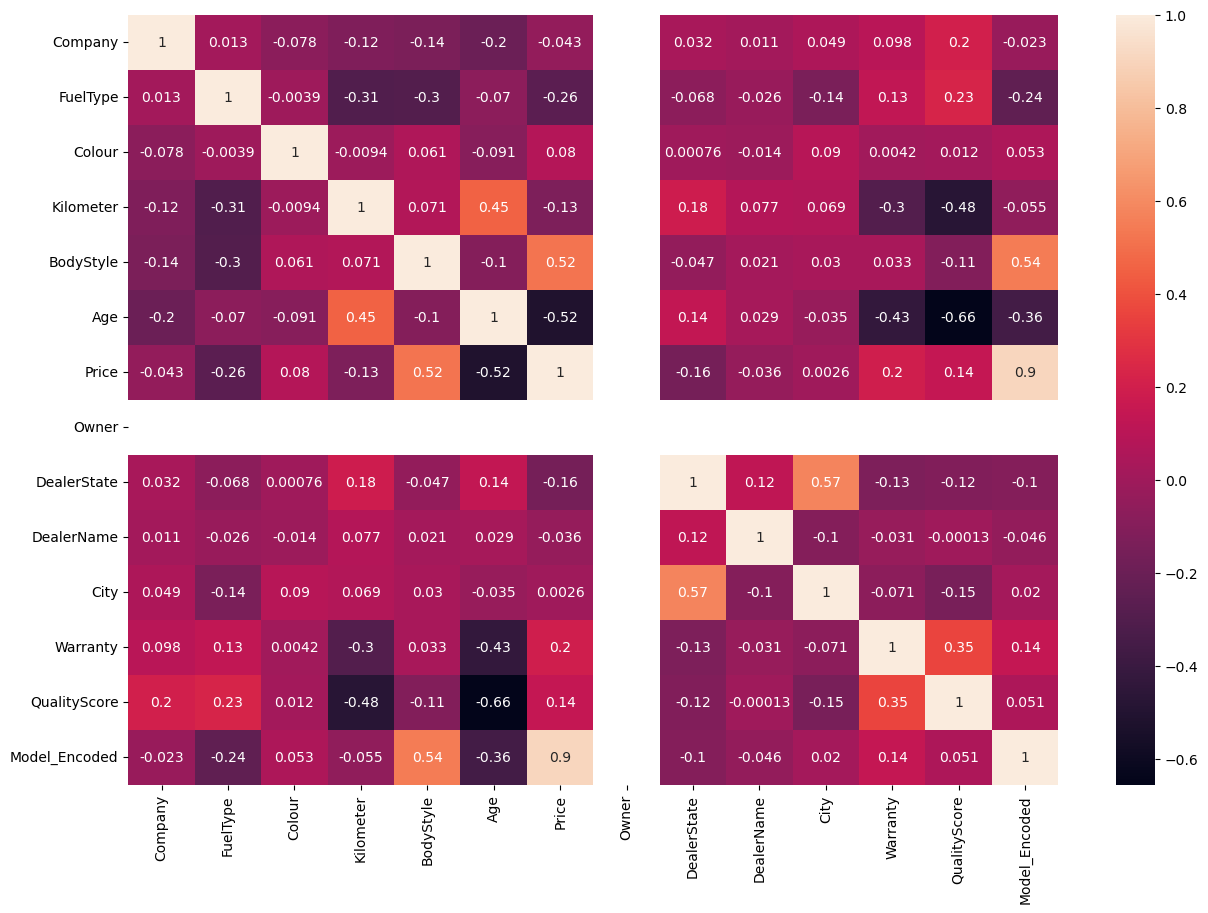

In [151]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Price',axis=1), df['Price'], test_size=0.2, random_state=42)

In [153]:
from sklearn.tree import DecisionTreeRegressor
#Decision Tree Regressor Object
dtr = DecisionTreeRegressor()

In [154]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
para = {
    'max_depth' : [2,4,6,8],
    'min_samples_leaf' : [2,4,6,8],
    'min_samples_split' : [2,4,6,8],
    'random_state' : [0,42]
}

#Grid Search Object
grid = GridSearchCV(estimator=dtr, param_grid=para, cv=5, n_jobs=-1, verbose=2)

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print(grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 2, 'random_state': 42}


In [155]:
#decision tree regressor with best parameters
dtr = DecisionTreeRegressor(max_depth=6, min_samples_leaf=2, min_samples_split=2, random_state=42)

#Fitting the model
dtr.fit(X_train, y_train)

#Training score
print(dtr.score(X_train, y_train))

0.9302424555548283


In [157]:
#Prediction
dtr_pred = dtr.predict(X_test)

In [158]:
from sklearn.ensemble import RandomForestRegressor
#Random Forest Regressor Object
rfr = RandomForestRegressor()

In [159]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
para = {
    'max_depth' : [2,4,6,8],
    'min_samples_leaf' : [2,4,6,8],
    'min_samples_split' : [2,4,6,8],
    'random_state' : [0,42]
}

#Grid Search Object
grid = GridSearchCV(estimator=rfr, param_grid=para, cv=5, n_jobs=-1, verbose=2)

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print(grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 42}


In [160]:
#Random Forest Regressor with best parameters
rfr = RandomForestRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=2, random_state=0)

#Fitting the model
rfr.fit(X_train, y_train)

#Training score
print(rfr.score(X_train, y_train))

0.9626739223379924


In [161]:
#Prediction
rfr_pred = rfr.predict(X_test)

In [162]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Decision Tree Regressor
print('Decision Tree Regressor')
print('Mean Squared Error : ', mean_squared_error(y_test, dtr_pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test, dtr_pred))
print('R2 Score : ', r2_score(y_test, dtr_pred))

#Random Forest Regressor
print('Random Forest Regressor')
print('Mean Squared Error : ', mean_squared_error(y_test, rfr_pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test, rfr_pred))
print('R2 Score : ', r2_score(y_test, rfr_pred))

Decision Tree Regressor
Mean Squared Error :  16875137155.56713
Mean Absolute Error :  99009.58385592552
R2 Score :  0.8569328545920675
Random Forest Regressor
Mean Squared Error :  11930082628.053352
Mean Absolute Error :  83263.87232539424
R2 Score :  0.8988569485188876


Text(0.5, 1.0, 'Random Forest Regressor')

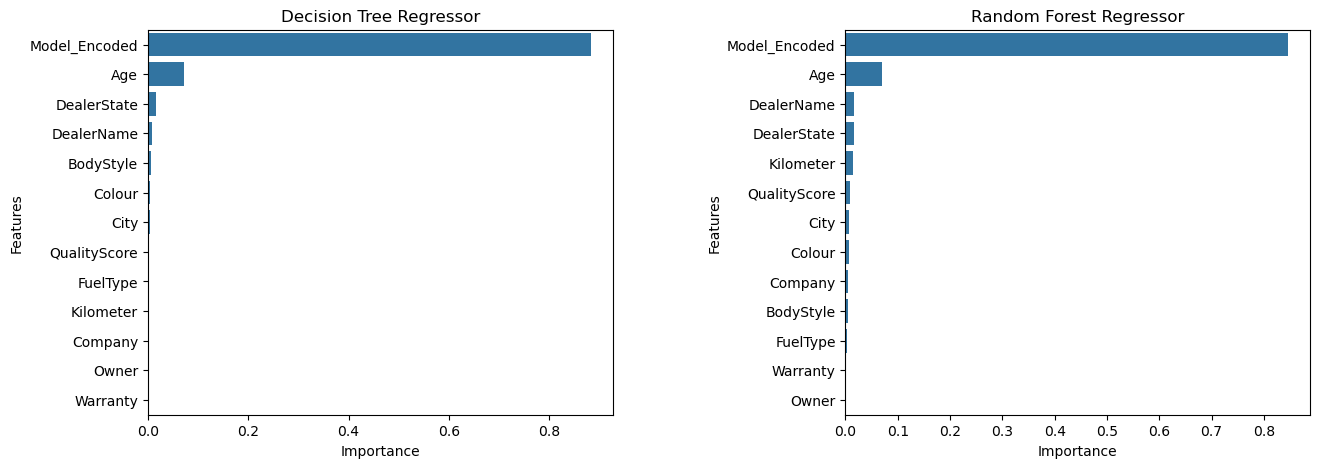

In [163]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
fig.subplots_adjust(wspace=0.5)

#Decision Tree Regressor
feature_df = pd.DataFrame({'Features':X_train.columns, 'Importance':dtr.feature_importances_})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax = ax[0]).set_title('Decision Tree Regressor')

#Random Forest Regressor
feature_df = pd.DataFrame({'Features':X_train.columns, 'Importance':rfr.feature_importances_})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax = ax[1]).set_title('Random Forest Regressor')